In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

In [98]:
#create a user defined grid of size m*n
def create_board(vertical,horizontal):
    board = [[0 for column in range(vertical)] for  cell in range(horizontal)]
    board = np.array(board)
    return board

In [99]:
board = create_board(6,6)
board

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [100]:
actions = ['up', 'right', 'down', 'left']

In [101]:
def intialize_obstacles(start,end):
    obstacles = []
    limit = int((board.shape[0]*board.shape[1])/6)
    count = 0
    while(count!=limit):
        ran = np.random.randint((board.shape[0]*board.shape[1]))
        if(ran!=start and ran!=end and ran not in obstacles):
            obstacles.append(ran)
            count+=1
        else:
            continue
    return obstacles

In [102]:
def position_obstacles(board,obstacles):
    horizontal = board.shape[0]
    vertical = board.shape[1]
    board = board.flatten()
    for i in obstacles:
        board[i] = -1
    board = np.reshape(board,(vertical,horizontal))
    return board

In [103]:
def multiplyList(l,col,row) :
    res = col*(l[0])+l[1]
    return res

In [104]:
start = [0,0]
end = [5,5]

vertical = 6
horizontal = 6

In [105]:
obstacles = intialize_obstacles(multiplyList(start,vertical,horizontal),multiplyList(end,vertical,horizontal))

In [106]:
board_with_obstacles = position_obstacles(board,obstacles)
board_with_obstacles

array([[ 0,  0,  0,  0, -1,  0],
       [ 0, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0],
       [ 0, -1,  0, -1,  0,  0],
       [ 0,  0,  0, -1,  0,  0]])

In [107]:
rewards = np.full((horizontal,vertical),-100.)
rewards[end[0],end[1]]= 100
for i in range(len(board_with_obstacles)):
    for j in range(len(board_with_obstacles[0])):
        # print(i,j)
        if(board_with_obstacles[i][j]==0 and rewards[i][j]!=100):
            rewards[i][j]=-1

len(board_with_obstacles),len(board_with_obstacles[0]),rewards[end[0],end[1]]

(6, 6, 100.0)

In [108]:
rewards

array([[  -1.,   -1.,   -1.,   -1., -100.,   -1.],
       [  -1., -100.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1., -100.,   -1.],
       [  -1., -100.,   -1., -100.,   -1.,   -1.],
       [  -1.,   -1.,   -1., -100.,   -1.,  100.]])

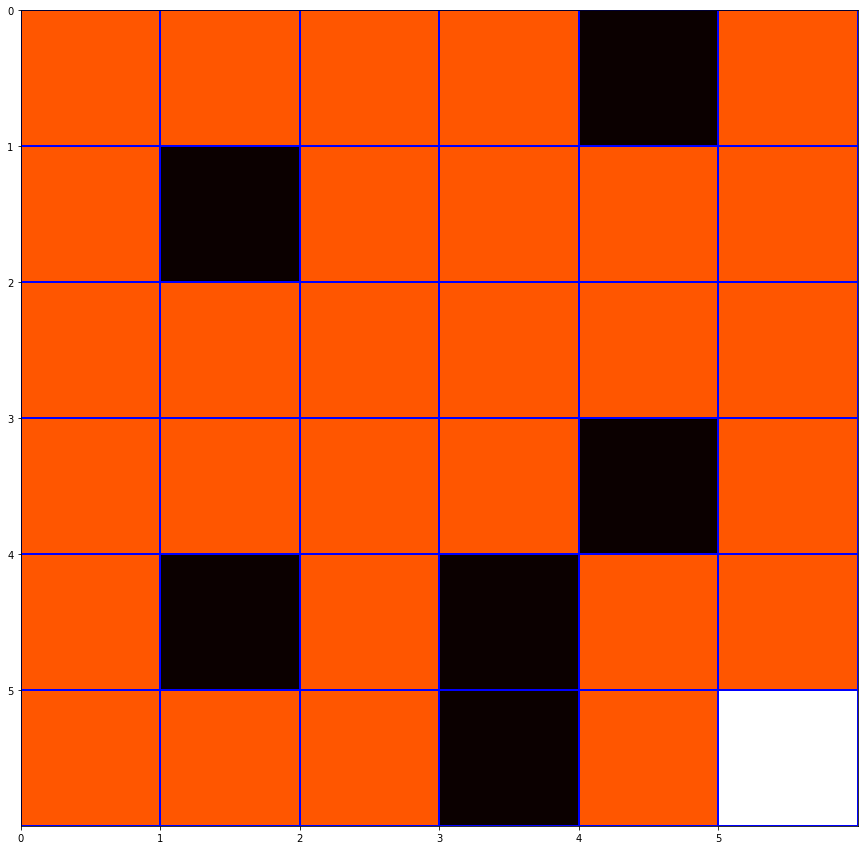

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.pcolormesh(rewards,edgecolors='b',cmap=plt.cm.hot)
plt.xlim(0,horizontal)
plt.ylim(vertical,0)
plt.xticks(np.arange(0, horizontal, 1.0))
plt.yticks(np.arange(0, vertical, 1.0))
plt.show()

In [110]:
def is_obstacle_state(current_row,current_col):
    if(rewards[current_row,current_col]==-1):
        return False
    else:
        return True

In [111]:
q_values = np.zeros((horizontal, vertical, 4))

In [112]:
def next_action(current_row_index, current_column_index, epsilon):
    if np.random.random() < epsilon:
        return np.argmax(q_values[current_row_index, current_column_index])
    else: 
        return np.random.randint(4)
    
def get_next_cell(current_row_index, current_column_index, action_index):
    new_row_index = current_row_index
    new_column_index = current_column_index
    if actions[action_index] == 'up' and current_row_index > 0:
        new_row_index -= 1
    elif actions[action_index] == 'right' and current_column_index < vertical - 1:
        new_column_index += 1
    elif actions[action_index] == 'down' and current_row_index < horizontal - 1:
        new_row_index += 1
    elif actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index

def get_shortest_path(start_row_index, start_column_index):
    if is_obstacle_state(start_row_index, start_column_index):
        return []
    else: 
        current_row_index, current_column_index = start_row_index, start_column_index
        shortest_path = []
        shortest_path.append([current_row_index, current_column_index])
    while not is_obstacle_state(current_row_index, current_column_index):
        action_index = next_action(current_row_index, current_column_index, 1.)
        current_row_index, current_column_index = get_next_cell(current_row_index, current_column_index, action_index)
        shortest_path.append([current_row_index, current_column_index])
    return shortest_path

In [113]:
lis = ['left','right','up','down']

In [114]:
epsilon = 0.9
discount_factor = 0.9
learning_rate = 0.9

all_costs = []
all_steps = []

for episode in range(2000):
    row_index, column_index = start[0],start[1]
    costs = 0
    steps = 0

    while not is_obstacle_state(row_index, column_index):
        action_index = next_action(row_index, column_index, epsilon)
        old_row_index, old_column_index = row_index, column_index 
        row_index, column_index = get_next_cell(row_index, column_index, action_index)
        reward = rewards[row_index, column_index]
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        new_action_index = next_action(row_index, column_index, epsilon)
        temp = q_values[row_index, column_index, new_action_index]
        temporal_difference = reward + (discount_factor *temp) - old_q_value
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_row_index, old_column_index, action_index] = new_q_value
        costs+=reward
        steps+=1

    # epsilon = max(epsilon * eps_decay_factor, eps_min)
    all_steps.append(steps)
    all_costs.append(costs)   
print('Training complete!')

Training complete!


In [115]:
episode

1999

In [116]:
q_values

array([[[ -17.14069825,   -8.60019666,  -85.77055824,  -75.00135145],
        [ -44.11146386,   19.34990066, -100.        ,  -57.42074528],
        [ -73.26034992,   29.97402118,   25.39973901,  -83.77445356],
        [ -83.13187255, -100.        ,   47.52825686,  -70.29168763],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [ -69.24788072,  -82.97650608,  -50.20838297, -100.        ]],

       [[ -47.25891109, -100.        ,  -68.1198911 ,  -84.94198156],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [ -49.71296224,   45.16576079,  -13.60441474, -100.        ],
        [ -45.54700147,  -82.32326897,   37.46472764,  -45.52484541],
        [-100.        ,  -53.15922423,  -11.50929464,  -20.95452346],
        [ -83.11170951,  -63.73925517,  -48.41655046,   -7.63764329]],

       [[ -84.95022267,  -78.95654513,  -45.4115485 ,  -68.41863883],
        [-100.        ,  -34.0338459 ,  -45.22839071,  -40.1630221 ],
        [  36.84

In [117]:
print(get_shortest_path(start[0], start[1]))

[[0, 0], [0, 1], [0, 2], [0, 3], [1, 3], [2, 3], [2, 4], [2, 5], [3, 5], [4, 5], [5, 5]]


In [ ]:
all_steps

In [119]:
#displaying qtable as dataframe

q = np.zeros((horizontal*vertical,6))
q_table = pd.DataFrame(q)
q_table.columns = ['state_row','state_col','up','down','left','right']
q_table['state_col'] = q_table['state_col'].astype(int)
q_table['state_row'] = q_table['state_row'].astype(int)
l=0
for i in range(vertical*horizontal):
    for j in range(vertical):
        q_table['state_col'][l+j]= j
    for k in range(horizontal):
        q_table['state_row'][l+k]=i
    l+=vertical

In [120]:
for i in range(len(q_values[0])):
  for j in range(len(q_values[1])):
    index = q_table[(q_table['state_row']==i) & (q_table['state_col']==j)].index
    index = int(index[0])
    for k in range(4):
       q_table.iloc[index,k+2] = q_values[i][j][k]

In [121]:
q_table

,state_row,state_col,up,down,left,right
0,0,0,-17.140698,-8.600197,-85.770558,-75.001351
1,0,1,-44.111464,19.349901,-100.000000,-57.420745
2,0,2,-73.260350,29.974021,25.399739,-83.774454
3,0,3,-83.131873,-100.000000,47.528257,-70.291688
4,0,4,0.000000,0.000000,0.000000,0.000000
5,0,5,-69.247881,-82.976506,-50.208383,-100.000000
6,1,0,-47.258911,-100.000000,-68.119891,-84.941982
7,1,1,0.000000,0.000000,0.000000,0.000000
8,1,2,-49.712962,45.165761,-13.604415,-100.000000
9,1,3,-45.547001,-82.323269,37.464728,-45.524845


In [122]:
list1  = get_shortest_path(start[0], start[1])

In [123]:
action_direction = dict()
for i in range(len(list1)-1):
  if(list1[i][0] - list1[i+1][0] == -1):
    action_direction[(list1[i][0],list1[i][1])] = "LEFT"
  elif(list1[i][0] - list1[i+1][0] == 1):
    action_direction[(list1[i][0],list1[i][1])] = "RIGHT"
  elif(list1[i][1] - list1[i+1][1] == -1):
    action_direction[(list1[i][0],list1[i][1])] = "UP"
  elif(list1[i][1] - list1[i+1][1] == 1):
    action_direction[(list1[i][0],list1[i][1])] = "DOWN"

In [124]:
action_direction

{(0, 0): 'UP',
 (0, 1): 'UP',
 (0, 2): 'UP',
 (0, 3): 'LEFT',
 (1, 3): 'LEFT',
 (2, 3): 'UP',
 (2, 4): 'UP',
 (2, 5): 'LEFT',
 (3, 5): 'LEFT',
 (4, 5): 'LEFT'}

In [125]:
direction_map = {
    'UP'   : ( 0, 1),
    'DOWN' : ( 0,-1),
    'RIGHT': ( 1, 0),
    'LEFT' : (-1, 0)
}

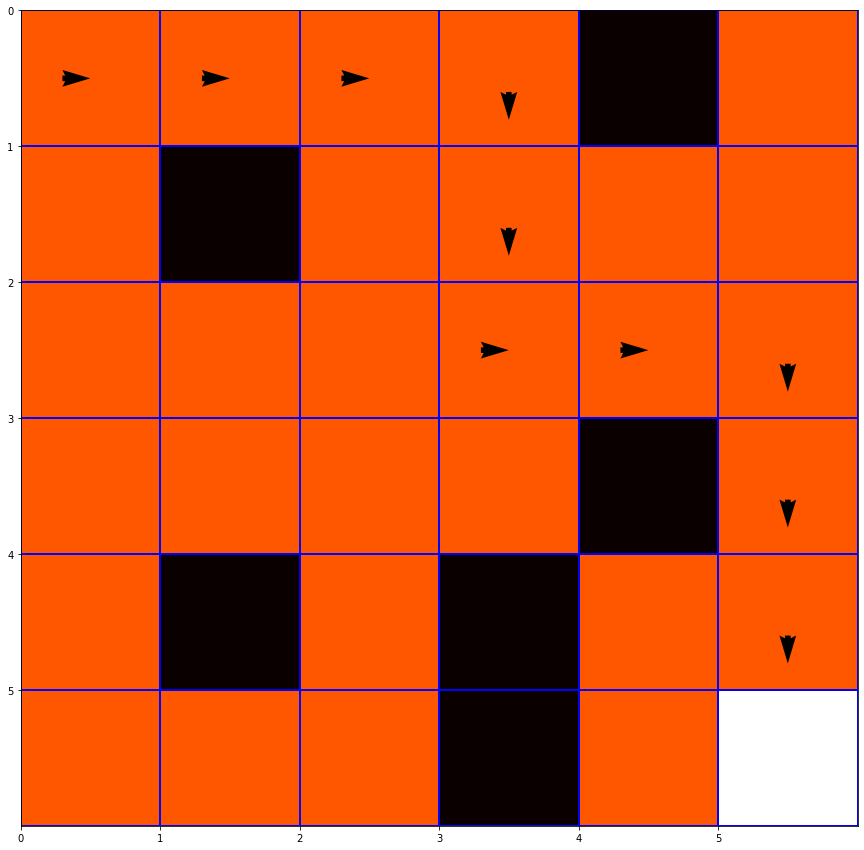

In [126]:
def arrow_position(location, arrow_direction):
    if arrow_direction == 'UP':
        correction = (.5, .3)
    elif arrow_direction == 'DOWN':
        correction = (.6, .3)
    elif arrow_direction == 'RIGHT':
        correction = (.4, .5)
    elif arrow_direction == 'LEFT':
        correction = (.6, .5)
    return (location[0]+correction[0],
            location[1]+correction[1])


fig, ax = plt.subplots(figsize=(15,15))
plt.pcolormesh(rewards,edgecolor='b',cmap=plt.cm.hot)
plt.xlim(0,horizontal)
plt.ylim(vertical,0)
# plt.grid(True)
plt.xticks(np.arange(0, horizontal, 1.0))
plt.yticks(np.arange(0, vertical, 1.0))

locations = action_direction.keys()
for location in locations:
    arrow_direction = action_direction[location]
    x_pos, y_pos = arrow_position(location, arrow_direction)
    x_direct, y_direct = direction_map[arrow_direction]
    ax.quiver(
        y_pos,x_pos,
        y_direct,x_direct,
        scale=30)

# plt.figure(figsize=(15,15))
plt.show()

In [127]:
episodes = []
for i in range(0,2000):
  episodes.append(i)

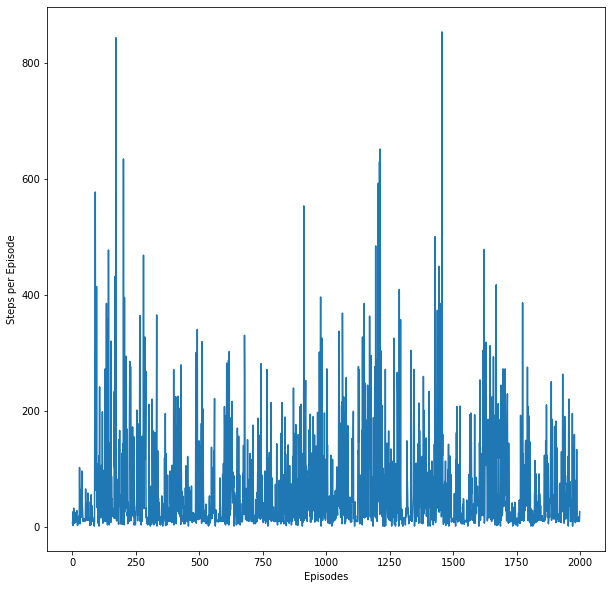

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(episodes,all_steps)
plt.xlabel("Episodes")
plt.ylabel("Steps per Episode")
plt.show()

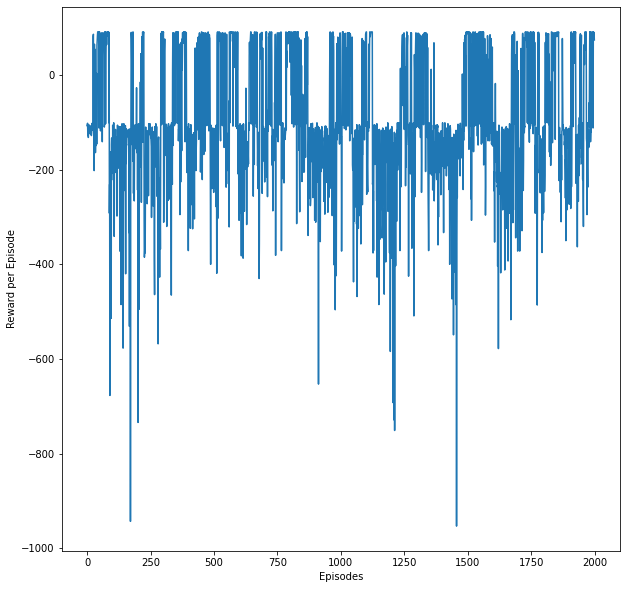

In [129]:
plt.figure(figsize=(10,10))
plt.plot(episodes,all_costs)
plt.xlabel("Episodes")
plt.ylabel("Reward per Episode")
plt.show()